In [93]:
# QUESTION NUMBER:1
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [94]:
# Step 1: Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/parkinsons.data")

In [95]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [109]:
data.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [110]:
data.shape

(195, 23)

In [96]:
# Step2: Pre-processing the data

# Finding missing values
print("Missing values:\n", data.isna().sum())

Missing values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64



No NULL Values observed, hence no need of handling NULL values`



In [97]:
# Step 4: Feature Extraction
# Encoding of the 'name' column is not necessary as its correlation is minimal and can be ignored
data.drop(columns=['name'], inplace=True)

In [98]:
# Step2: Pre-processing the data
# Standarization

from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(data)
print(scale)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


<Axes: xlabel='MDVP:Fo(Hz)'>

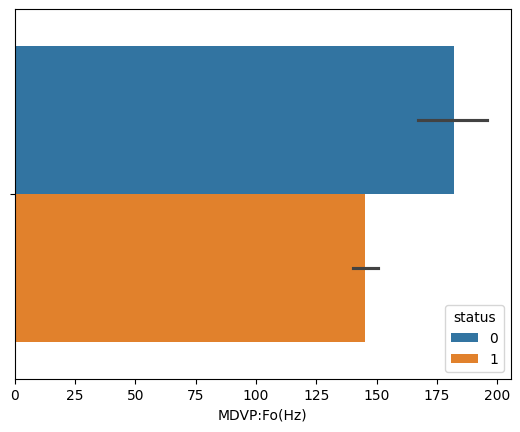

In [99]:
# Step3: Exploratory Data Analysis

sns.barplot(data, x="MDVP:Fo(Hz)", hue="status")

In [100]:
print(data.describe())

       MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000

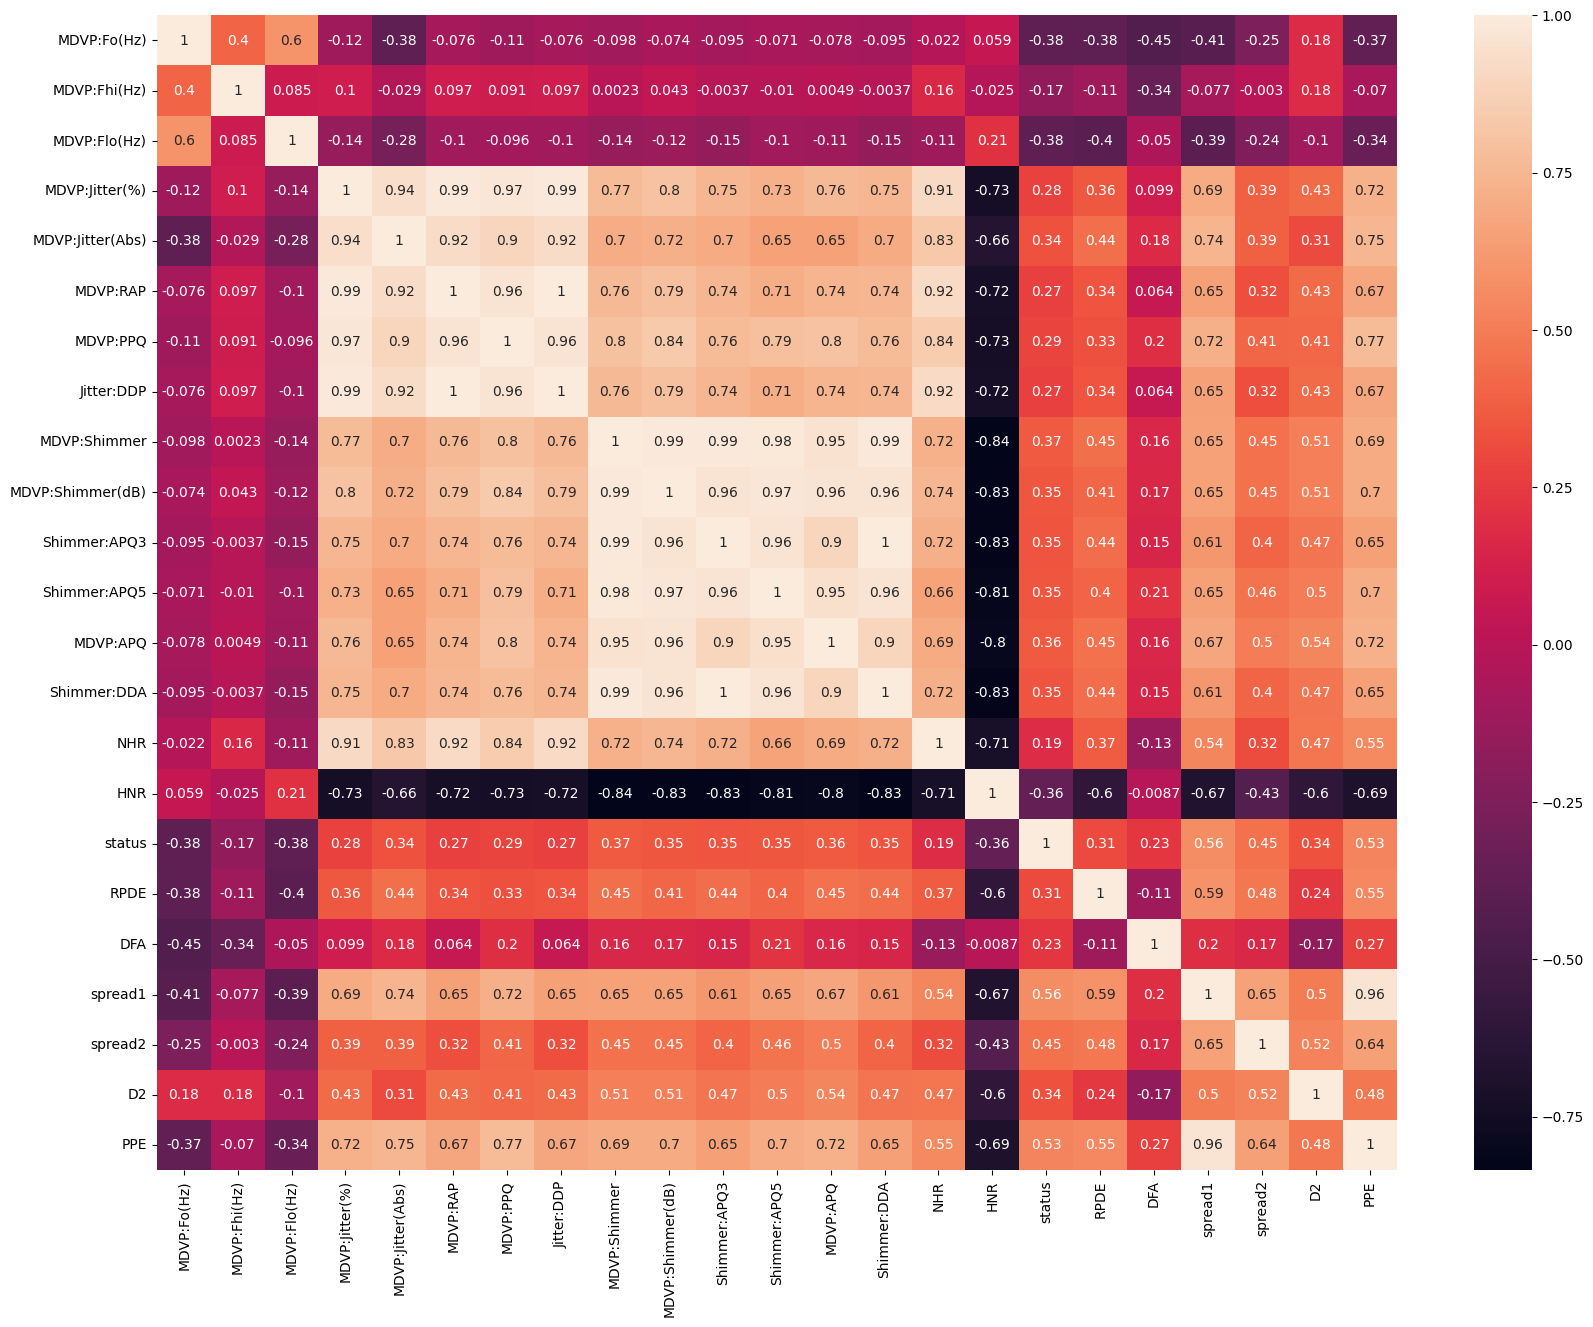

In [101]:
# We try to remove the columns with low correlation to the target column or select the features with high correlation
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()


# Since the correlation of every other column against status is high, we do not drop any other columns except name.

In [102]:
# Step 5: Split the data into training, testing, and validation sets
X = data.drop(columns=['status'])
y = data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Step 6: Train the model
models = {
  # 'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(),
    'Naive Bayes':GaussianNB(),
    'Percepton': Perceptron()
}
for name, model in models.items():
    model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


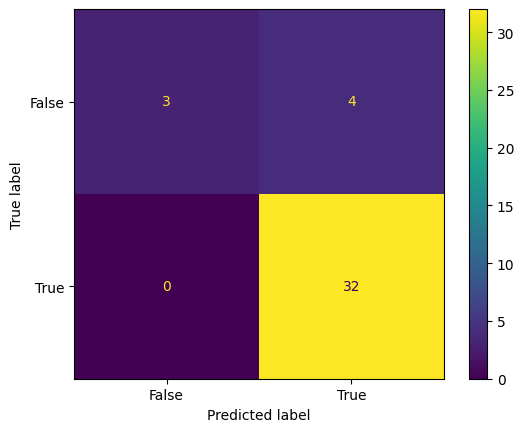

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Logistic Regression: 0.8974358974358975


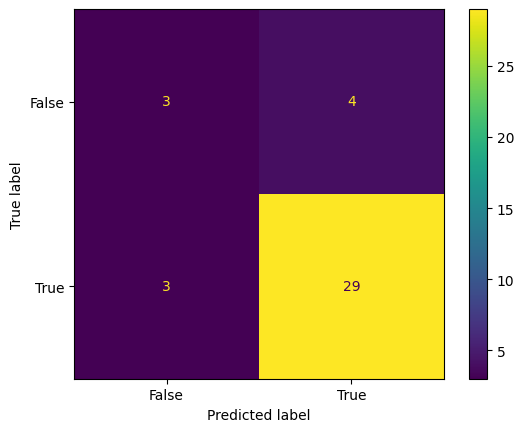

              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.88      0.91      0.89        32

    accuracy                           0.82        39
   macro avg       0.69      0.67      0.68        39
weighted avg       0.81      0.82      0.81        39

KNN: 0.8205128205128205


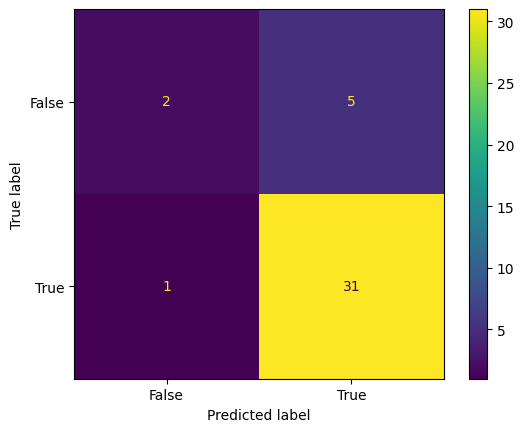

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.86      0.97      0.91        32

    accuracy                           0.85        39
   macro avg       0.76      0.63      0.66        39
weighted avg       0.83      0.85      0.82        39

SVM: 0.8461538461538461


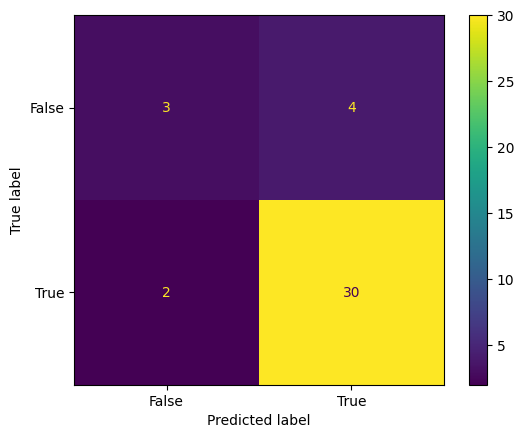

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.88      0.94      0.91        32

    accuracy                           0.85        39
   macro avg       0.74      0.68      0.70        39
weighted avg       0.83      0.85      0.84        39

MLP: 0.8461538461538461


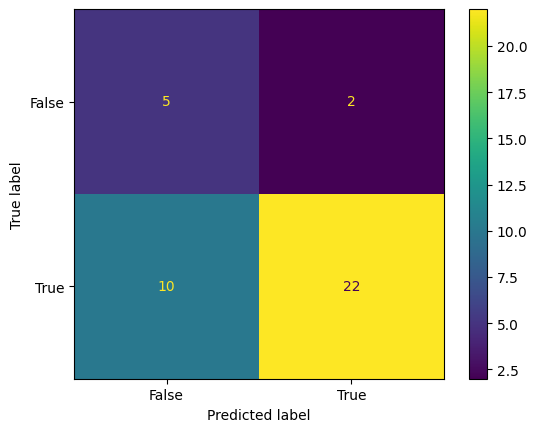

              precision    recall  f1-score   support

           0       0.33      0.71      0.45         7
           1       0.92      0.69      0.79        32

    accuracy                           0.69        39
   macro avg       0.62      0.70      0.62        39
weighted avg       0.81      0.69      0.73        39

Naive Bayes: 0.6923076923076923


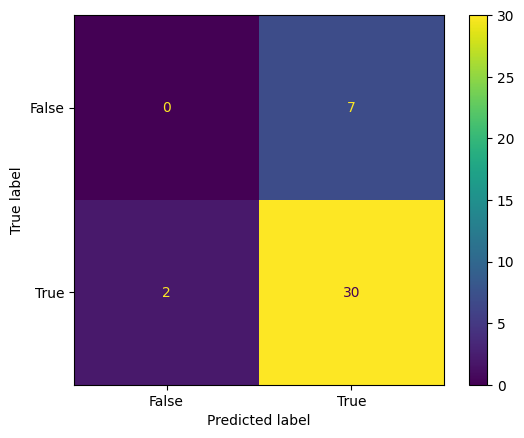

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.81      0.94      0.87        32

    accuracy                           0.77        39
   macro avg       0.41      0.47      0.43        39
weighted avg       0.67      0.77      0.71        39

Percepton: 0.7692307692307693


In [112]:
# Step 7: Test the model
from sklearn import metrics
from sklearn.metrics import classification_report
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    print(classification_report(y_test, y_pred))

    results[name] = accuracy
    print(f"{name}: {accuracy}")

In [105]:
# Step 8: Measure the performance of the model
best_model = max(results, key=results.get)
print(f"Best model: {best_model} with accuracy: {results[best_model]}")

#INTERPRETATION: Logistic regression is often a good choice for binary classification problems,
#especially when the relationship between the features and the target variable is relatively linear.
#It's also interpretable and less prone to overfitting compared to more complex models like neural networks.

Best model: Logistic Regression with accuracy: 0.8974358974358975


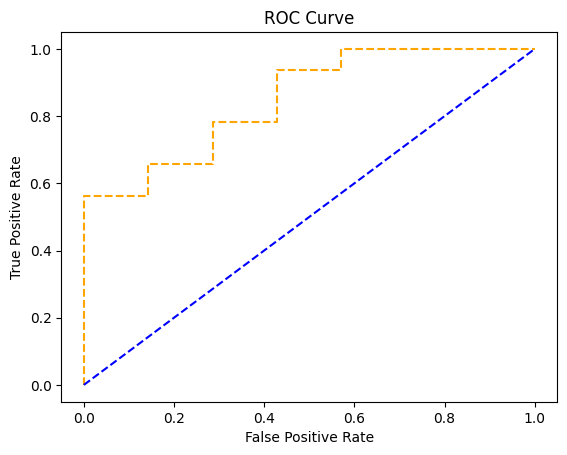

Training accuracy: 0.8525641025641025


In [108]:
# Step 9: Represent the training and testing results using ROC curves
y_pred_proba = models[best_model].predict_proba(X_test)[:,1]
fpr1, tpr1, thresh1 = roc_curve(y_test, y_pred_proba, pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

train_accuracy = accuracy_score(y_train, models[best_model].predict(X_train))
print(f"Training accuracy: {train_accuracy}")


In [107]:
# Step 10: KMeans Clustering
kmeans = KMeans(n_clusters=2) #No of clusters is 2 because the value of 'status' is boolean(1 or 0)
kmeans.fit(X)
labels = kmeans.labels_
print("Cluster performance:", accuracy_score(y, labels))

Cluster performance: 0.27692307692307694


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
